In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import matplotlib.font_manager as fm
import matplotlib as mpl

import math
plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['font.size'] = 23
import seaborn as sns; sns.set()

datas_full = ['mini_test', 'tiered_test', "places", "plantae", "cars", "cub", 'crop','euro', 'isic', 'chest']
datas_fullname = ['miniIN','tieredIN','Places','Plantae', 'Cars', 'CUB', 'CropDiseases', 'EuroSAT', 'ISIC', 'ChestX']
backbone = ['18', '34', '50', '101', '152']
cdfsl = ['mini_test','crop', 'euro', 'isic', 'chest']
noncdfsl = ["places", "plantae", "cars", "cub", 'tiered_test']


import matplotlib
#myfonts = "Times New Roman"
matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams['font.family'] = myfonts
print(mpl.rcParams['font.family'])
print(mpl.rcParams['font.size'])
print(mpl.matplotlib_fname())

['Times New Roman']
12.0
/opt/conda/lib/python3.8/site-packages/matplotlib/mpl-data/matplotlibrc


In [43]:
color = ["red", "black"]

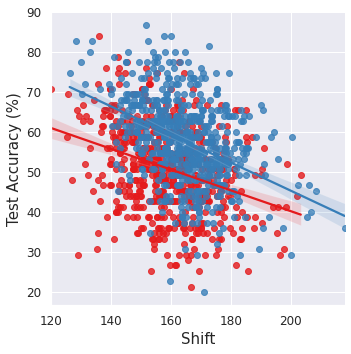

In [69]:
# f(s)-f(q) vs. f'(s')-f'(q)
for data in ['euro']:
    aug_acc = pd.read_csv('./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_001shot_full_default/mixup/both/shift_history.csv'.format(data), index_col='Unnamed: 0')
    aug_acc.rename(columns = {'shift_aug':'shift'},inplace=True)
    aug_acc['color'] = 'base augmentation'
    shift_acc = pd.read_csv('./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_001shot_full_default/shift_history.csv'.format(data), index_col='Unnamed: 0')
    shift_acc['color'] = 'no augmentation'
    df = pd.concat([aug_acc, shift_acc])
    df = df.reset_index()
    df["test_acc"] = df["test_acc"]*100
    graph = sns.lmplot( x="shift", y="test_acc", data=df, fit_reg=True, hue='color', palette='Set1', legend=False)
    #graph.figure.set_size_inches(18.5, 7)
    #plt.legend()
    plt.ylabel("Test Accuracy (%)", size = 15)
    plt.xlabel("Shift", size = 15)
    plt.xticks(size=12)
    plt.yticks(size=12)
    sns.despine()

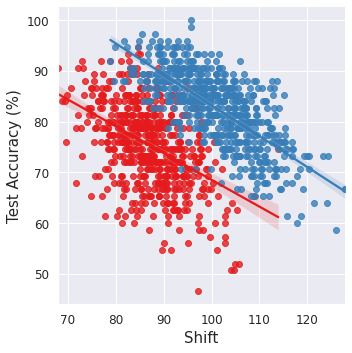

In [67]:
# f(s)-f(q) vs. f'(s)-f'(q)
for data in ['euro']:
    aug_acc = pd.read_csv('./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_005shot_full_default/mixup/both/shift_history.csv'.format(data), index_col='Unnamed: 0')
    aug_acc.rename(columns = {'shift_clean':'shift'},inplace=True)
    aug_acc['color'] = 'base augmentation'
    shift_acc = pd.read_csv('./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_005shot_full_default/shift_history.csv'.format(data), index_col='Unnamed: 0')
    shift_acc['color'] = 'no augmentation'
    df = pd.concat([aug_acc, shift_acc])
    df = df.reset_index()
    df["test_acc"] = df["test_acc"]*100
    graph = sns.lmplot( x="shift", y="test_acc", data=df, fit_reg=True, hue='color', palette='Set1', legend=False)
    #graph.figure.set_size_inches(18.5, 7)
    #plt.legend()
    plt.ylabel("Test Accuracy (%)", size = 15)
    plt.xlabel("Shift", size = 15)
    plt.xticks(size=12)
    plt.yticks(size=12)
    sns.despine()

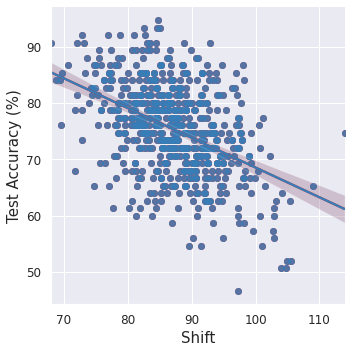

In [68]:
# f'(s)-f'(q) vs. f'(s')-f'(q)
for data in ['euro']:
    aug_acc = pd.read_csv('./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_005shot_full_default/mixup/both/shift_history.csv'.format(data), index_col='Unnamed: 0')
    aug_acc.rename(columns = {'shift_aug':'shift'},inplace=True)
    aug_acc['color'] = 'base augmentation'
    shift_acc = pd.read_csv('./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_005shot_full_default/mixup/both/shift_history.csv'.format(data), index_col='Unnamed: 0')
    shift_acc.rename(columns = {'shift_clean':'shift'},inplace=True)
    shift_acc['color'] = 'no augmentation'
    df = pd.concat([aug_acc, shift_acc])
    df = df.reset_index()
    df["test_acc"] = df["test_acc"]*100
    graph = sns.lmplot( x="shift", y="test_acc", data=df, fit_reg=True, hue='color', palette='Set1', legend=False)
    #graph.figure.set_size_inches(18.5, 7)
    #plt.legend()
    plt.ylabel("Test Accuracy (%)", size = 15)
    plt.xlabel("Shift", size = 15)
    plt.xticks(size=12)
    plt.yticks(size=12)
    sns.despine()

AttributeError: 'FacetGrid' object has no attribute 'figure'

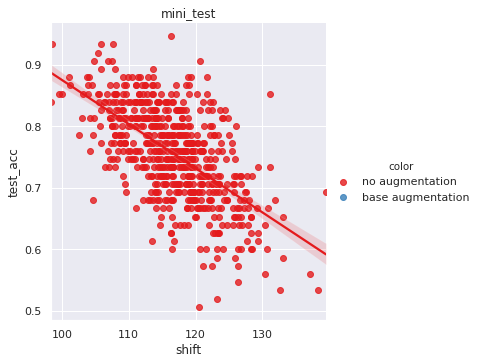

In [25]:
for data in cdfsl:
    mixup_acc = pd.read_csv('./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_005shot_full_default/augmentation/base/shift_history.csv'.format(data), index_col='Unnamed: 0')
    mixup_acc['color'] = 'base augmentation'
    shift_acc = pd.read_csv('./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_005shot_full_default/shift_history.csv'.format(data), index_col='Unnamed: 0')
    shift_acc['color'] = 'no augmentation'
    df = pd.concat([shift_acc, mixup_acc])
    df = df.reset_index()
    graph = sns.lmplot( x="shift", y="test_acc", data=df, fit_reg=True, hue='color', palette='Set1').set(title=data)
    graph.figure.set_size_inches(18.5, 7)
    plt.legend()
    sns.despine()

In [63]:
test_acc.max(axis=1)

1      0.840000
2      0.906667
3      0.826667
4      0.933333
5      0.786667
         ...   
596    0.800000
597    0.813333
598    0.800000
599    0.733333
600    0.933333
Length: 600, dtype: float64

In [22]:
valid_acc

,epoch1,epoch2,epoch3,epoch4,epoch5,epoch6,epoch7,epoch8,epoch9,epoch10,...,epoch91,epoch92,epoch93,epoch94,epoch95,epoch96,epoch97,epoch98,epoch99,epoch100
1,0.20,0.32,0.48,0.80,0.88,0.96,1.00,1.00,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,0.40,0.48,0.72,0.84,0.96,1.00,0.96,0.96,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,0.48,0.76,0.84,1.00,1.00,1.00,1.00,1.00,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,0.24,0.48,0.92,0.88,0.84,1.00,0.92,1.00,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5,0.32,0.56,0.76,0.72,0.96,1.00,0.96,0.96,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,0.28,0.40,0.80,0.92,0.96,0.96,1.00,1.00,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
597,0.52,0.64,0.76,0.88,0.96,1.00,1.00,1.00,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
598,0.28,0.40,0.68,0.76,0.92,0.96,1.00,1.00,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
599,0.36,0.48,0.64,0.80,0.96,1.00,1.00,1.00,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [24]:
test_acc

,epoch1,epoch2,epoch3,epoch4,epoch5,epoch6,epoch7,epoch8,epoch9,epoch10,...,epoch91,epoch92,epoch93,epoch94,epoch95,epoch96,epoch97,epoch98,epoch99,epoch100
1,0.200000,0.266667,0.306667,0.413333,0.533333,0.613333,0.720000,0.666667,0.680000,0.760000,...,0.813333,0.800000,0.786667,0.773333,0.813333,0.800000,0.773333,0.773333,0.800000,0.800000
2,0.320000,0.413333,0.573333,0.693333,0.666667,0.773333,0.813333,0.840000,0.800000,0.840000,...,0.893333,0.853333,0.853333,0.853333,0.853333,0.840000,0.866667,0.866667,0.826667,0.826667
3,0.240000,0.346667,0.413333,0.586667,0.613333,0.666667,0.693333,0.733333,0.706667,0.693333,...,0.746667,0.786667,0.720000,0.733333,0.760000,0.746667,0.746667,0.746667,0.746667,0.720000
4,0.213333,0.333333,0.520000,0.520000,0.573333,0.680000,0.693333,0.760000,0.786667,0.813333,...,0.880000,0.906667,0.906667,0.880000,0.893333,0.853333,0.906667,0.893333,0.880000,0.893333
5,0.400000,0.440000,0.506667,0.546667,0.680000,0.706667,0.706667,0.706667,0.733333,0.773333,...,0.760000,0.746667,0.746667,0.760000,0.746667,0.760000,0.760000,0.746667,0.760000,0.773333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,0.213333,0.253333,0.360000,0.533333,0.506667,0.440000,0.560000,0.573333,0.733333,0.680000,...,0.746667,0.760000,0.786667,0.773333,0.760000,0.773333,0.786667,0.760000,0.800000,0.773333
597,0.226667,0.373333,0.480000,0.520000,0.573333,0.613333,0.546667,0.493333,0.613333,0.666667,...,0.733333,0.760000,0.786667,0.800000,0.706667,0.706667,0.720000,0.786667,0.786667,0.746667
598,0.253333,0.333333,0.466667,0.560000,0.600000,0.560000,0.693333,0.666667,0.693333,0.626667,...,0.760000,0.760000,0.720000,0.760000,0.760000,0.706667,0.773333,0.760000,0.706667,0.693333
599,0.253333,0.360000,0.386667,0.440000,0.546667,0.546667,0.586667,0.600000,0.600000,0.626667,...,0.680000,0.653333,0.653333,0.653333,0.640000,0.680000,0.733333,0.720000,0.693333,0.706667


Testing Accuracy of baseline 75.61 ± 0.59


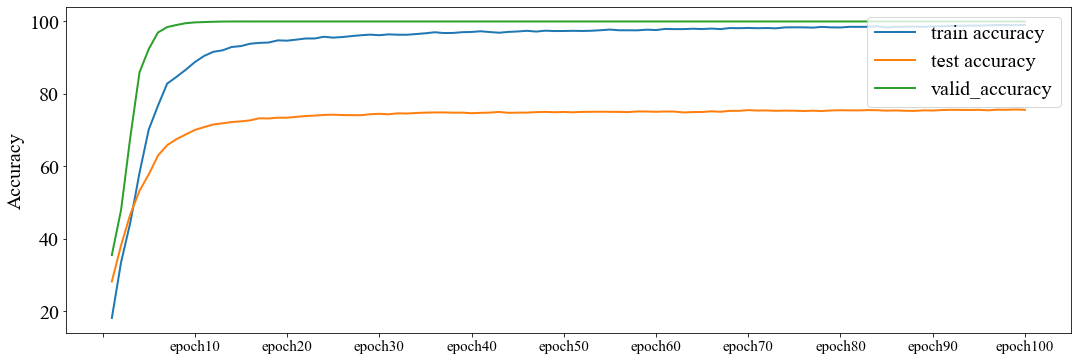

In [21]:
# middle
train_acc = pd.read_csv('./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_005shot_full_default/train_history.csv'.format(data), index_col='Unnamed: 0')
valid_acc = pd.read_csv('./logs/baseline/output/resnet10_simclr_LS_default/mini_test/05way_005shot_full_default/valid_history_base.csv'.format(data), index_col='Unnamed: 0')
test_acc = pd.read_csv('./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_005shot_full_default/test_history_base.csv'.format(data), index_col='Unnamed: 0')
#train_acc_clean = pd.read_csv('./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_001shot_head_default/test_clean_history_cutmix_v1_30_70.csv'.format(data), index_col='Unnamed: 0')
print ('Testing Accuracy of baseline {:.2f} ± {:.2f}'.format(test_acc.mean()[-1] * 100,
                                         1.96 * test_acc.std()[-1] / np.sqrt(600) * 100))
fig = plt.figure(figsize=(18,6))

plt.plot(train_acc.mean(axis=0)*100, label='train accuracy'.format(episode))
plt.plot(test_acc.mean(axis=0)*100, label='test accuracy'.format(episode))
plt.plot(valid_acc.mean(axis=0)*100, label='valid_accuracy'.format(episode))
plt.xticks(np.arange(-1, 100, 10), fontsize = 15)
plt.yticks(fontsize = 20)
plt.ylabel("Accuracy", fontsize=20)
plt.legend(fontsize=20, loc=1)
plt.show()
plt.close()

Testing Accuracy of baseline 75.74 ± 0.65


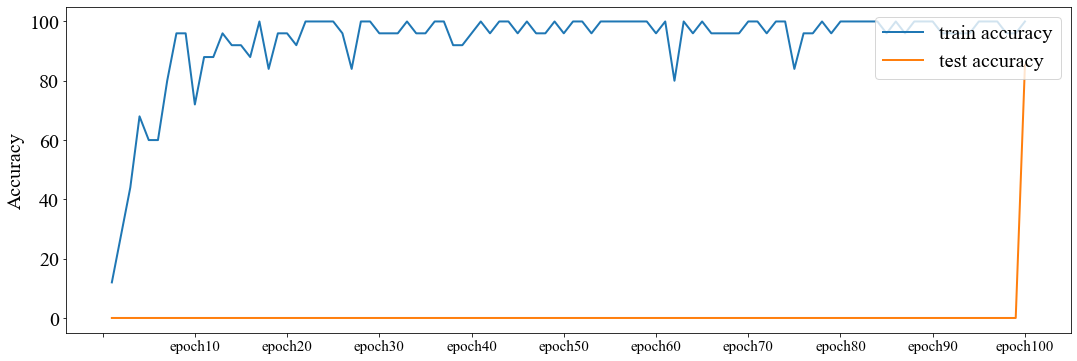

In [12]:
# middle
train_acc = pd.read_csv('./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_005shot_full_default/train_history.csv'.format(data), index_col='Unnamed: 0')
#valid_acc = pd.read_csv('./logs/baseline/output/resnet10_simclr_LS_default/mini_test/05way_005shot_full_default/augmentation/randomhorizontalflip/valid_history.csv'.format(data), index_col='Unnamed: 0')
test_acc = pd.read_csv('./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_005shot_full_default/test_history.csv'.format(data), index_col='Unnamed: 0')
#train_acc_clean = pd.read_csv('./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_001shot_head_default/test_clean_history_cutmix_v1_30_70.csv'.format(data), index_col='Unnamed: 0')
print ('Testing Accuracy of baseline {:.2f} ± {:.2f}'.format(test_acc.mean()[-1] * 100,
                                         1.96 * test_acc.std()[-1] / np.sqrt(600) * 100))
fig = plt.figure(figsize=(18,6))

plt.plot(train_acc.loc[episode]*100, label='train accuracy'.format(episode))
plt.plot(test_acc.loc[episode]*100, label='test accuracy'.format(episode))
#plt.plot(valid_acc.loc[episode]*100, label='valid_accuracy'.format(episode))
plt.xticks(np.arange(-1, 100, 10), fontsize = 15)
plt.yticks(fontsize = 20)
plt.ylabel("Accuracy", fontsize=20)
plt.legend(fontsize=20, loc=1)
plt.show()
plt.close()

In [ ]:
train_acc = pd.read_csv('./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_001shot_head_default/cutmix/train_history_30_70.csv'.format(data), index_col='Unnamed: 0')
clean_acc = pd.read_csv('./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_001shot_head_default/cutmix/clean_history_30_70.csv'.format(data), index_col='Unnamed: 0')
test_acc = pd.read_csv('./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_001shot_head_default/cutmix/test_history_30_70.csv'.format(data), index_col='Unnamed: 0')
train_acc_clean = pd.read_csv('./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_001shot_head_default/cutmix/clean_history_30_70.csv'.format(data), index_col='Unnamed: 0')
print ('Testing Accuracy of baseline {:.2f} ± {:.2f}'.format(test_acc.mean()[-1] * 100,
                                         1.96 * test_acc.std()[-1] / np.sqrt(600) * 100))
fig = plt.figure(figsize=(18,6))

plt.plot(train_acc.loc[episode]*100, label='train accuracy'.format(episode))
plt.plot(test_acc.loc[episode]*100, label='test accuracy'.format(episode))
plt.plot(clean_acc.loc[episode]*100, label='clean_accuracy'.format(episode))
plt.xticks(np.arange(-1, 100, 10), fontsize = 15)
plt.yticks(fontsize = 20)
plt.ylabel("Accuracy", fontsize=20)
plt.legend(fontsize=20, loc=1)
plt.show()
plt.close()

In [ ]:
./logs/baseline/output/resnet10_simclr_LS_default/chest/05way_001shot_full_default/shift_history.csv

/home/yujin/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='shift', ylabel='test_acc'>

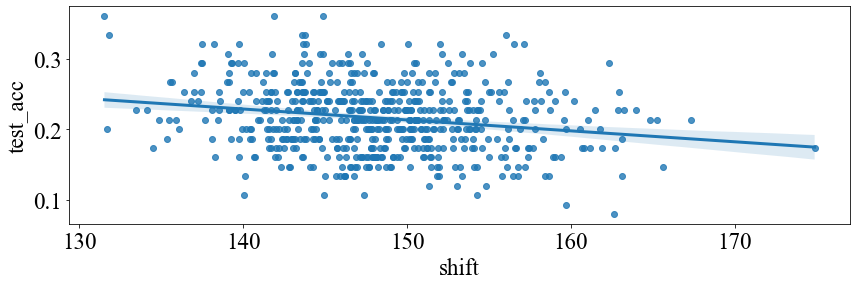

In [69]:
shift_acc = pd.read_csv('./logs/baseline/output/resnet10_simclr_LS_default/chest/05way_001shot_full_default/mixup/both/shift_history.csv'.format(data), index_col='Unnamed: 0')
sns.regplot(shift_acc['shift'], shift_acc['test_acc'])

In [78]:
df

,index,shift,test_acc,color
0,1,154.371674,0.266667,blue
1,2,153.446823,0.173333,blue
2,3,163.547989,0.293333,blue
3,4,154.744171,0.253333,blue
4,5,170.943756,0.173333,blue
...,...,...,...,...
1195,596,146.034454,0.293333,red
1196,597,145.862183,0.293333,red
1197,598,147.705658,0.226667,red
1198,599,136.047455,0.200000,red


/home/yujin/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='shift', ylabel='test_acc'>

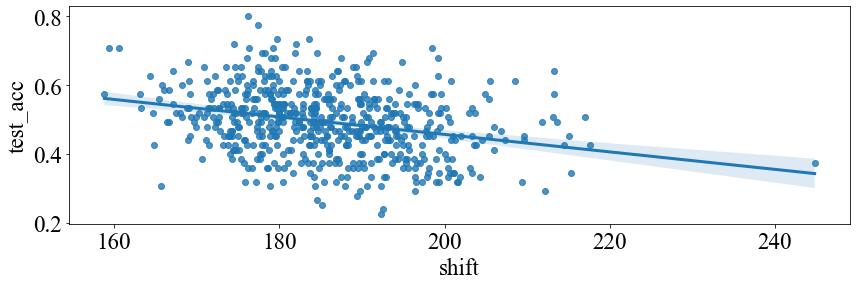

In [65]:
import seaborn as sns
shift_acc = pd.read_csv('./logs/baseline/output/resnet10_simclr_LS_default/mini_test/05way_001shot_full_default/shift_history.csv'.format(data), index_col='Unnamed: 0')
sns.regplot(shift_acc['shift'], shift_acc['test_acc'])

/home/yujin/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='shift', ylabel='test_acc'>

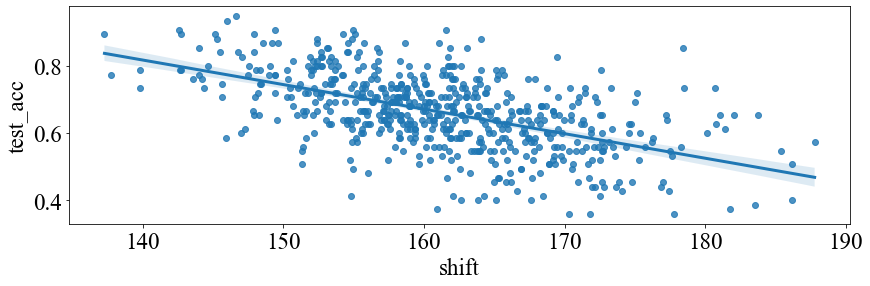

In [66]:
import seaborn as sns
shift_acc = pd.read_csv('./logs/baseline/output/resnet10_simclr_LS_default/crop/05way_001shot_full_default/shift_history.csv'.format(data), index_col='Unnamed: 0')
sns.regplot(shift_acc['shift'], shift_acc['test_acc'])

/home/yujin/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='shift', ylabel='test_acc'>

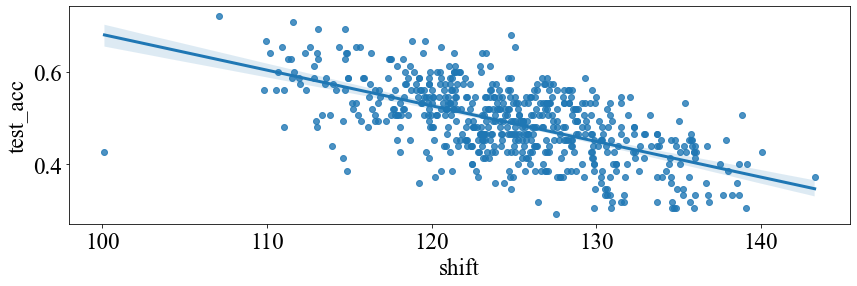

In [67]:
import seaborn as sns
shift_acc = pd.read_csv('./logs/baseline/output/resnet10_simclr_LS_default/isic/05way_005shot_full_default/shift_history.csv'.format(data), index_col='Unnamed: 0')
sns.regplot(shift_acc['shift'], shift_acc['test_acc'])

/tmp/ipykernel_6905/660368325.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(shift_acc)
/tmp/ipykernel_6905/660368325.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(shift_acc)
/tmp/ipykernel_6905/660368325.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(shift_acc)
/tmp/ipykernel_6905/660368325.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(shift_acc)
/tmp/ipykernel_6905/660368325.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(shift_acc)
/home/yujin/ana

UFuncTypeError: Cannot cast ufunc 'svd_n_s' input from dtype('O') to dtype('float64') with casting rule 'same_kind'

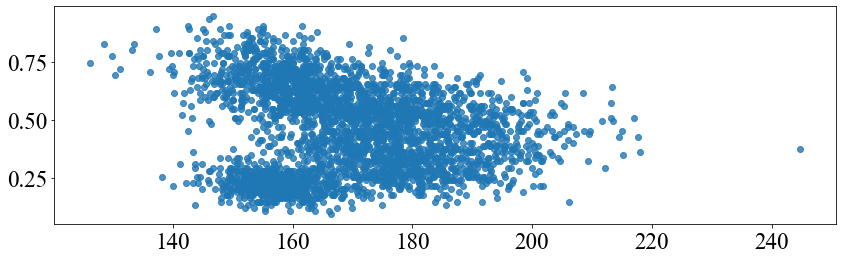

In [24]:
df = pd.DataFrame(columns=['shift', 'test_acc', 'data'])
for data in cdfsl:
    shift_acc = pd.read_csv('./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_001shot_full_default/shift_history.csv'.format(data), index_col='Unnamed: 0')
    shift_acc = shift_acc.astype('float64')
    shift_acc['data'] = str(data)
    df = df.append(shift_acc)

#sns.lmplot( x="sepal_length", y="sepal_width", data=df, fit_reg=False, hue='species', legend=False)
sns.regplot(df['shift'], df['test_acc'])

In [40]:
shift_acc

,shift,test_acc,data
1,0.306358,0.240000,chest
2,0.301403,0.186667,chest
3,0.317042,0.200000,chest
4,0.302040,0.213333,chest
5,0.337120,0.226667,chest
...,...,...,...
96,0.304189,0.200000,chest
97,0.301251,0.186667,chest
98,0.302694,0.226667,chest
99,0.289542,0.306667,chest


AttributeError: 'DataFrame' object has no attribute 'summary'